In [41]:

import copy
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import os  

import timeit

import math
import matplotlib.pyplot as plt

from eightPuzzle import eightPuzzle
from bfs import breadthFirstSearch
from ids import iterativeDeepeningSearch
from ucs import uniformCostSearch
from heuristics import manhattanDistance, misplacedTiles
from aStar import aStar
from gready import gready
from hillClimbing import hillClimbing
from node import Node

In [63]:
entradas = open('entradas. txt', 'r')
numbers = {0,1,2,3,4,5,6,7,8}
input = [[[0 for x in range(3)]for y in range(3)]for z in range(32)]
lines = entradas.readlines()
k = 0
for line in lines:
    j = 0
    for i in line:
        print(i)
        if i != '\n' and i != ' ' and i != ',':
            input[k][j//3][j%3] = int(i)
            print(i)
            j += 1
    k += 1

1
1
,
2
2
,
3
3
,
4
4
,
5
5
,
6
6
,
7
7
,
8
8
,
0
0


1
1
,
2
2
,
3
3
,
4
4
,
5
5
,
6
6
,
7
7
,
0
0
,
8
8


1
1
,
2
2
,
3
3
,
4
4
,
0
0
,
5
5
,
7
7
,
8
8
,
6
6


1
1
,
0
0
,
3
3
,
4
4
,
2
2
,
5
5
,
7
7
,
8
8
,
6
6


1
1
,
5
5
,
2
2
,
4
4
,
0
0
,
3
3
,
7
7
,
8
8
,
6
6


1
1
,
5
5
,
2
2
,
0
0
,
4
4
,
3
3
,
7
7
,
8
8
,
6
6


1
1
,
5
5
,
2
2
,
4
4
,
8
8
,
3
3
,
7
7
,
6
6
,
0
0


1
1
,
5
5
,
2
2
,
4
4
,
8
8
,
0
0
,
7
7
,
6
6
,
3
3


0
0
,
5
5
,
2
2
,
1
1
,
8
8
,
3
3
,
4
4
,
7
7
,
6
6


1
1
,
0
0
,
2
2
,
8
8
,
5
5
,
3
3
,
4
4
,
7
7
,
6
6


5
5
,
8
8
,
2
2
,
1
1
,
0
0
,
3
3
,
4
4
,
7
7
,
6
6


5
5
,
8
8
,
2
2
,
1
1
,
7
7
,
3
3
,
4
4
,
0
0
,
6
6


5
5
,
8
8
,
2
2
,
1
1
,
7
7
,
3
3
,
0
0
,
4
4
,
6
6


5
5
,
8
8
,
2
2
,
0
0
,
7
7
,
3
3
,
1
1
,
4
4
,
6
6


5
5
,
8
8
,
2
2
,
7
7
,
0
0
,
3
3
,
1
1
,
4
4
,
6
6


8
8
,
0
0
,
2
2
,
5
5
,
7
7
,
3
3
,
1
1
,
4
4
,
6
6


8
8
,
7
7
,
2
2
,
5
5
,
0
0
,
3
3
,
1
1
,
4
4
,
6
6


5
5
,
0
0
,
8
8
,
7
7
,
3
3
,
2
2
,
1
1
,
4
4
,
6
6


8
8
,
7
7
,
2
2
,
5
5
,
4
4


In [2]:
def plot(puzzle: eightPuzzle, ax=None, title=None, fs=20):
        if ax is None:
            _, ax = plt.subplots(1)
            
        gs = 3
        
        # draw border
        border = plt.Rectangle((0, 0), gs, gs, ec='k', fc='pink', lw=3)
        ax.add_patch(border)
        
        # draw tiles
        for i, tile in enumerate(puzzle.grid.flatten()):
            if tile == 0: continue
            col = 3 - 1 - i // 3
            row = i %  3
            cell = plt.Rectangle((row, col), 1, 1, fc='pink', ec='k', lw=3, alpha=0.4)
            ax.add_patch(cell)
            tileSq = plt.Rectangle((row + 0.15, col + 0.15), 0.7, 0.7, fc='hotpink', ec='k', lw=1, alpha=0.8)
            ax.add_patch(tileSq)
            ax.text(row + 0.5, col + 0.5, f"{tile}", color='k', fontsize=fs, va='center', ha='center')
        
        ax.axis('square')
        ax.axis('off')
        if title:
            ax.set_title(title, fontsize=fs)

In [38]:
def plotSolution(puzzle, solution: list) -> None:
    fig, axes = plt.subplots(1, 1 + len(solution), figsize=(15, 3))
    plot(puzzle, axes[0], title='State', fs=8) 
    for i in range(len(solution)):
        puzzle.move(solution[i])
        plot(puzzle, axes[i+1], title=f'Step {i+1}', fs=8)

In [ ]:
algoritmos = [breadthFirstSearch, iterativeDeepeningSearch, uniformCostSearch, aStar, gready, hillClimbing]
for algoritmo in algoritmos:
    table = []
    os.makedirs(f'results/{algoritmo}', exist_ok=True)  
    for i in range(32):
        nome = f"problema_{i}"
        start = timeit.default_timer()
        puzzle = eightPuzzle(input[i])
        print(f"problema: {i}")
        print(puzzle.grid)
        solution, history = breadthFirstSearch(puzzle)
        stop = timeit.default_timer()
        table.append([input[i], len(solution), stop - start])
        d = pd.DataFrame(history, columns =['Cost', 'interations'])
        d.to_csv(f'results/{algoritmo}/{nome}.csv')
        
    df = pd.DataFrame(table, columns =['Problem','Explored', 'Time'])
    df.to_csv(f'results/{algoritmo}/table.csv')

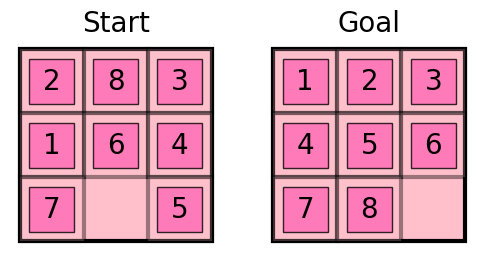

In [20]:
# define start state and goal state
start_state_tiles = np.array([[2, 8, 3], [1, 6, 4], [7, 0, 5]])
goal_state_tiles = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])
start_state = eightPuzzle(start_state_tiles)
goal_state = eightPuzzle(goal_state_tiles)

# plot the start state and the goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot(start_state, axes[0], 'Start')
plot(goal_state, axes[1], 'Goal')
plt.show()